# Pymaceuticals Conclusions

> 1. The only two effective treatments are Ramicane and Capomulin, as they are the only drugs that showed reduced tumor size at the end of the experiment. All other treatments closely follow the placebo and show tumor growth.
1. Mouse survival correlates with effectiveness of treatment, reducing tumor growth has a direct affect on mouse survival over the 45-day trial.
1. All treatments have an affect on metastatic spread. This is the only measure in which each treatment is lower than the placebo. Both Ramicane and Capomulin have the lowest rates of metastatic sites but both end with some metastasis.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data)
trial_df = pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
exp_df = pd.merge(mouse_df, trial_df, on="Mouse ID")

# Display the data table for preview
exp_df.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tvol_gb = exp_df.groupby(["Drug","Timepoint"], as_index=False)

# Convert to DataFrame
tvol_df = tvol_gb[["Tumor Volume (mm3)"]].mean()

# Preview DataFrame
tvol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tvol_gb = exp_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tvol_sem = tvol_gb[["Tumor Volume (mm3)"]].sem().reset_index()

# Preview DataFrame
tvol_sem.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tvol_pivot = tvol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tsem_pivot = tvol_sem.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
tvol_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


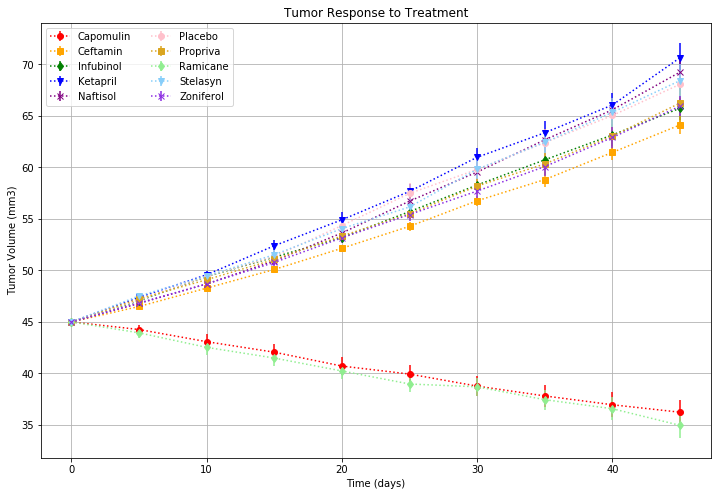

In [5]:
# Generate the Plot (with Error Bars)
handles = list(tvol_pivot.keys())
time=tvol_pivot.index.values

plt.figure(figsize=(12,8))

plt.errorbar(time, tvol_pivot.iloc[:,0], yerr=tsem_pivot.iloc[:,0], color='red', linestyle=":", marker='o')
plt.errorbar(time, tvol_pivot.iloc[:,1], yerr=tsem_pivot.iloc[:,1], color='orange', linestyle=":", marker='s')
plt.errorbar(time, tvol_pivot.iloc[:,2], yerr=tsem_pivot.iloc[:,2], color='green', linestyle=":", marker='d')
plt.errorbar(time, tvol_pivot.iloc[:,3], yerr=tsem_pivot.iloc[:,3], color='blue', linestyle=":", marker='v')
plt.errorbar(time, tvol_pivot.iloc[:,4], yerr=tsem_pivot.iloc[:,4], color='purple', linestyle=":", marker='x')
plt.errorbar(time, tvol_pivot.iloc[:,5], yerr=tsem_pivot.iloc[:,5], color='pink', linestyle=":", marker='o')
plt.errorbar(time, tvol_pivot.iloc[:,6], yerr=tsem_pivot.iloc[:,6], color='goldenrod', linestyle=":", marker='s')
plt.errorbar(time, tvol_pivot.iloc[:,7], yerr=tsem_pivot.iloc[:,7], color='lightgreen', linestyle=":", marker='d')
plt.errorbar(time, tvol_pivot.iloc[:,8], yerr=tsem_pivot.iloc[:,8], color='lightskyblue', linestyle=":", marker='v')
plt.errorbar(time, tvol_pivot.iloc[:,9], yerr=tsem_pivot.iloc[:,9], color='blueviolet', linestyle=":", marker='x')

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.grid(which="major", axis="both")
plt.legend(labels=handles, loc=2, ncol=2)

# Save the Figure
#plt.savefig("Tumor_Response.png")

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
met_gb = exp_df.groupby(["Drug","Timepoint"], as_index=False)

# Convert to DataFrame
met_df = met_gb[["Metastatic Sites"]].mean()

# Preview DataFrame
met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
met_gb = exp_df.groupby(["Drug","Timepoint"])

# Convert to DataFrame
met_sem = met_gb[["Metastatic Sites"]].sem().reset_index()

# Preview DataFrame
met_sem.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot = met_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
metsem_pivot = met_sem.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
met_pivot.head()
metsem_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


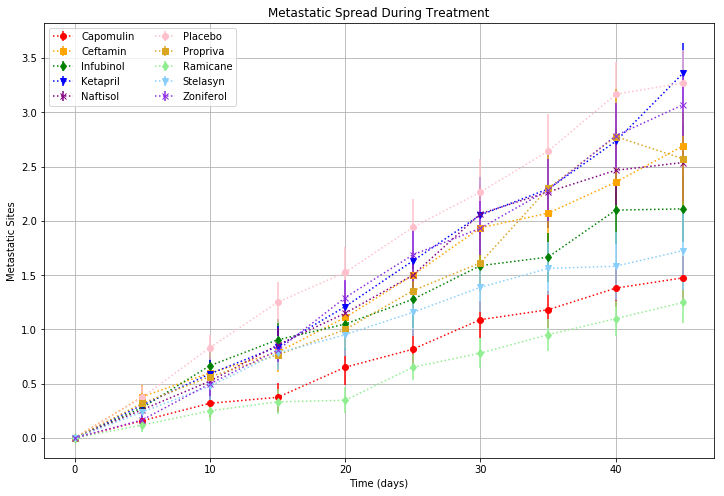

In [10]:
# Generate the Plot (with Error Bars)
handles = list(met_pivot.keys())
time=met_pivot.index.values

plt.figure(figsize=(12,8))

plt.errorbar(time, met_pivot.iloc[:,0], yerr=metsem_pivot.iloc[:,0], color='red', linestyle=":", marker='o')
plt.errorbar(time, met_pivot.iloc[:,1], yerr=metsem_pivot.iloc[:,1], color='orange', linestyle=":", marker='s')
plt.errorbar(time, met_pivot.iloc[:,2], yerr=metsem_pivot.iloc[:,2], color='green', linestyle=":", marker='d')
plt.errorbar(time, met_pivot.iloc[:,3], yerr=metsem_pivot.iloc[:,3], color='blue', linestyle=":", marker='v')
plt.errorbar(time, met_pivot.iloc[:,4], yerr=metsem_pivot.iloc[:,4], color='purple', linestyle=":", marker='x')
plt.errorbar(time, met_pivot.iloc[:,5], yerr=metsem_pivot.iloc[:,5], color='pink', linestyle=":", marker='o')
plt.errorbar(time, met_pivot.iloc[:,6], yerr=metsem_pivot.iloc[:,6], color='goldenrod', linestyle=":", marker='s')
plt.errorbar(time, met_pivot.iloc[:,7], yerr=metsem_pivot.iloc[:,7], color='lightgreen', linestyle=":", marker='d')
plt.errorbar(time, met_pivot.iloc[:,8], yerr=metsem_pivot.iloc[:,8], color='lightskyblue', linestyle=":", marker='v')
plt.errorbar(time, met_pivot.iloc[:,9], yerr=metsem_pivot.iloc[:,9], color='blueviolet', linestyle=":", marker='x')

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (days)")
plt.grid(which="major", axis="both")
plt.legend(labels=handles, loc=2, ncol=2)

# Save the Figure
plt.savefig("Metastatic_Spread.png")

# Show the Figure
plt.show()


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_gb = exp_df.groupby(["Drug","Timepoint"], as_index=False)

# Convert to DataFrame
survival_df=survival_gb[["Metastatic Sites"]].count()
survival_df=survival_df.rename(columns={"Metastatic Sites":"Mouse Count"})

# Preview DataFrame
survival_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot = survival_df.pivot(index="Timepoint",columns="Drug",values="Mouse Count")

# Preview the Data Frame
survival_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


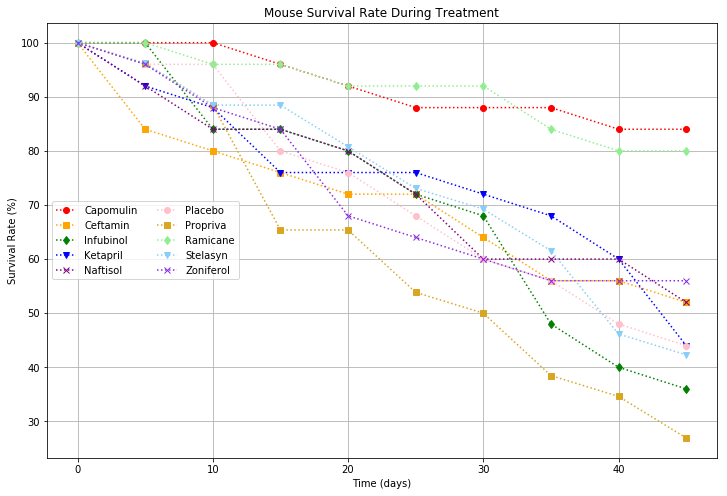

In [13]:
# Generate the Plot (Accounting for percentages)
survival_percent = pd.DataFrame()
handles = list(survival_pivot.keys())
for drug in handles:
    survival_percent[drug]=survival_pivot[drug]/survival_pivot[drug].iat[0]*100

time=survival_pivot.index.values

survival_percent.head()

plt.figure(figsize=(12,8))

plt.plot(time, survival_percent.iloc[:,0], color='red', linestyle=":", marker='o')
plt.plot(time, survival_percent.iloc[:,1], color='orange', linestyle=":", marker='s')
plt.plot(time, survival_percent.iloc[:,2], color='green', linestyle=":", marker='d')
plt.plot(time, survival_percent.iloc[:,3], color='blue', linestyle=":", marker='v')
plt.plot(time, survival_percent.iloc[:,4], color='purple', linestyle=":", marker='x')
plt.plot(time, survival_percent.iloc[:,5], color='pink', linestyle=":", marker='o')
plt.plot(time, survival_percent.iloc[:,6], color='goldenrod', linestyle=":", marker='s')
plt.plot(time, survival_percent.iloc[:,7], color='lightgreen', linestyle=":", marker='d')
plt.plot(time, survival_percent.iloc[:,8], color='lightskyblue', linestyle=":", marker='v')
plt.plot(time, survival_percent.iloc[:,9], color='blueviolet', linestyle=":", marker='x')

plt.title("Mouse Survival Rate During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.grid(which="major")
plt.legend(ncol=2, loc=6)

# Save the Figure
plt.savefig("Survival_Rate.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
drug_per=[]
for value in range(len(handles)):
    drug_per.append((tvol_pivot.iloc[9,value]-tvol_pivot.iloc[0,value])/tvol_pivot.iloc[0,value]*100)

per_df = pd.DataFrame({"Drug":handles,"Percent Change":drug_per})
per_df
# Display the data to confirm


,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


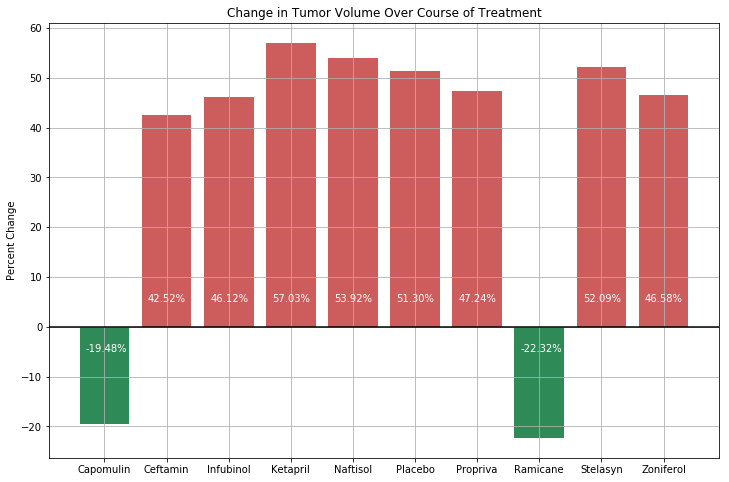

In [15]:
#add true/false column to chart for positive/negative
per_df["Pos/Neg"]=per_df["Percent Change"] >0
per_df

# Build the bar chart
plt.figure(figsize=(12,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, drug_per, color=per_df["Pos/Neg"].map({True:"indianred", False:"seagreen"}))
plt.axhline(color="black")
plt.grid(which="major")
plt.xticks(x_axis, labels=handles)
plt.title("Change in Tumor Volume Over Course of Treatment")
plt.ylabel("Percent Change")

#format percent values to text/rounded
per_txt=[]
per_txt=per_df["Percent Change"]
per_txt = per_txt.map("{:.2f}%".format)

#for loop to label values
for x in x_axis:
    if per_df["Pos/Neg"][x]==True:
        plt.text(x=x-.3, y=5, s=per_txt[x], color="white")
    else:
        plt.text(x=x-.3, y=-5, s=per_txt[x], color="white")


# Save the Figure
plt.savefig("Tumor_Growth.png")


# Show the Figure
plt.show()